# Crime Dashboard  Technology used Python(language), Pandas(D & A),
# Matplotlib(plot), folium(map plot)

In [4]:
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import squarify

# for providing path
import os

In [6]:
data = pd.read_csv(r'Police.csv',index_col=0)

In [7]:
data.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y'],
      dtype='object')

In [8]:
data.head(2)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y
0,120058272.0,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,Kannur,"ARREST, BOOKED",800 Block of BRYANT ST,10.987279,75.449288
1,120058272.0,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,Kannur,"ARREST, BOOKED",800 Block of BRYANT ST,10.930298,75.858397


In [9]:
data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y
0,120058272.0,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,Kannur,"ARREST, BOOKED",800 Block of BRYANT ST,10.987279,75.449288
1,120058272.0,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,Kannur,"ARREST, BOOKED",800 Block of BRYANT ST,10.930298,75.858397
2,141059263.0,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,Thiruvananthapuram,"ARREST, BOOKED",KEITH ST / SHAFTER AV,10.029486,74.812788
3,160013662.0,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 0:00,23:50,Pathanamthitta,NONE,JONES ST / OFARRELL ST,10.913995,75.397887
4,160002740.0,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 0:00,0:30,Alapuzha,NONE,16TH ST / Alapuzha ST,12.359188,74.878511


In [10]:
data.describe()


,IncidntNum,X,Y
count,1.504990e+05,150500.000000,150500.000000
mean,1.616440e+08,10.505240,75.492227
std,5.535983e+06,1.155382,0.735595
min,1.135121e+07,8.500054,74.220003
25%,1.603283e+08,9.511065,74.854681
50%,1.606541e+08,10.501827,75.492104
75%,1.609764e+08,11.509713,76.127589
max,9.910090e+08,12.499935,76.769998


In [11]:
## checking if there are any null values
data.isnull().sum()


IncidntNum    1
Category      1
Descript      1
DayOfWeek     1
Date          1
Time          1
PdDistrict    1
Resolution    1
Address       1
X             0
Y             0
dtype: int64

In [12]:
# filling the missing value in PdDistrict using the mode values

data['PdDistrict'].fillna(data['PdDistrict'].mode()[0], inplace = True)

data.isnull().any().any()

True

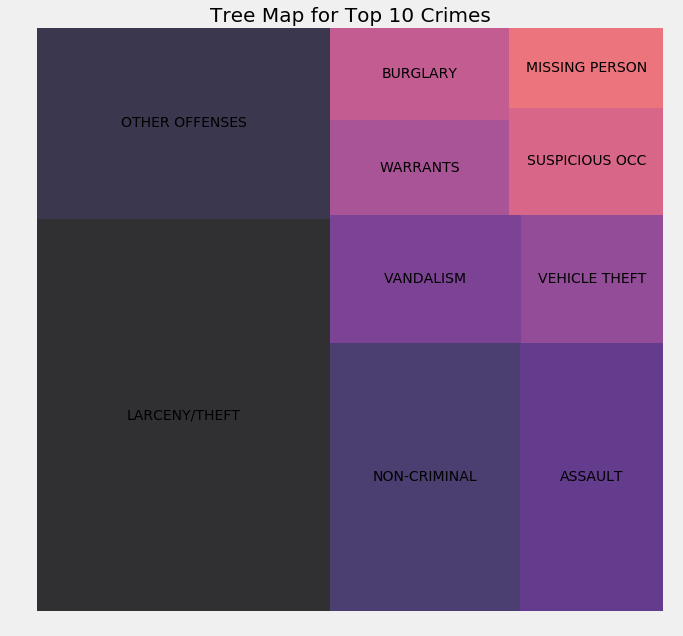

In [13]:
# plotting a tree map

y = data['Category'].value_counts().head(10)
    
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fivethirtyeight')

color = plt.cm.magma(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Top 10 Crimes', fontsize = 20)

plt.axis('off')
plt.show()

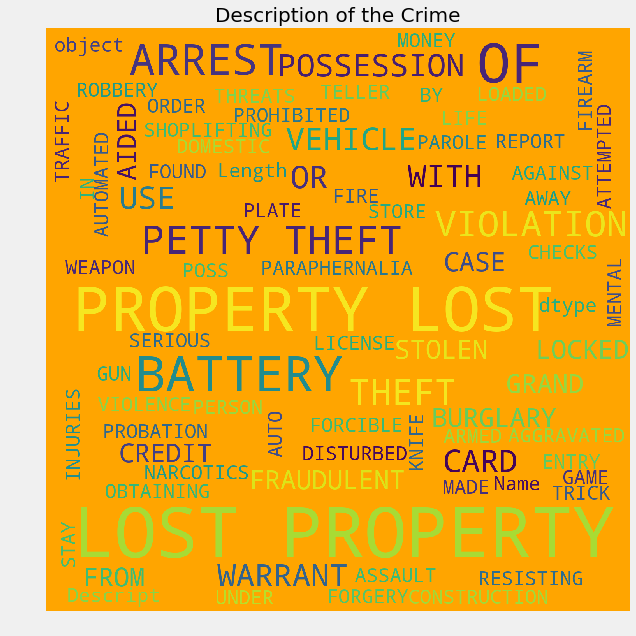

In [16]:
# description of the crime

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')

wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(data['Descript']))
plt.title('Description of the Crime', fontsize = 20)

plt.imshow(wc)
plt.axis('off')
plt.show()

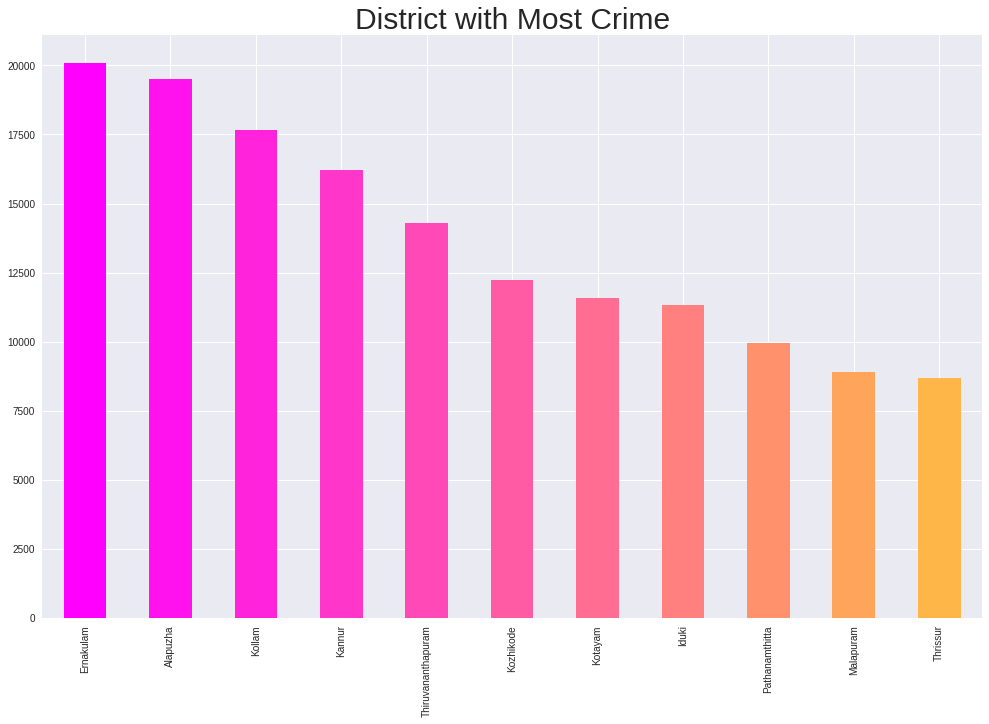

In [27]:
# Regions with count of crimes

plt.rcParams['figure.figsize'] = (5, 4)
plt.style.use('seaborn')

color = plt.cm.spring(np.linspace(0, 1, 15))
data['PdDistrict'].value_counts().plot.bar(color = color, figsize = (15, 10))

plt.title('District with Most Crime',fontsize = 30)

plt.xticks(rotation = 90)
plt.show()

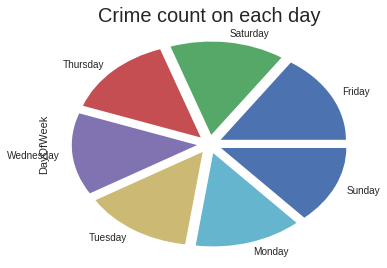

In [24]:
# Regions with count of crimes

plt.style.use('seaborn')


data['DayOfWeek'].value_counts().head(15).plot.pie(figsize = (5, 4), explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))

plt.title('Crime count on each day',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()

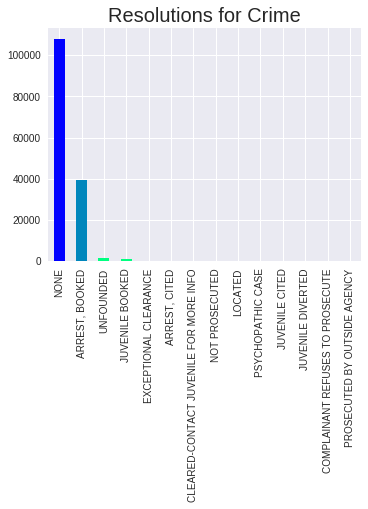

In [25]:
# Regions with count of crimes

plt.style.use('seaborn')

color = plt.cm.winter(np.linspace(0, 10, 20))
data['Resolution'].value_counts().plot.bar(color = color, figsize = (5, 4))

plt.title('Resolutions for Crime',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

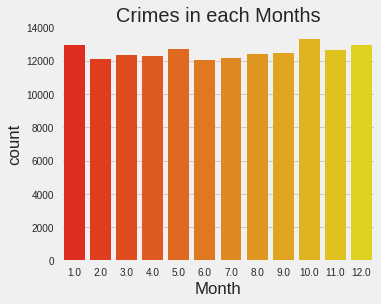

In [26]:
data['Date'] = pd.to_datetime(data['Date'])

data['Month'] = data['Date'].dt.month

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (5, 4)

sns.countplot(data['Month'], palette = 'autumn',)
plt.title('Crimes in each Months', fontsize = 20)

plt.show()

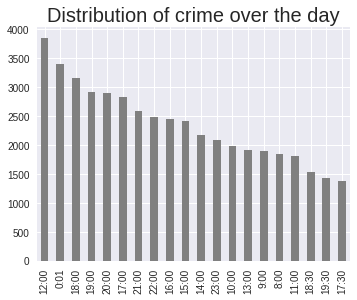

In [35]:
# checking the time at which crime occurs mostly

import warnings
warnings.filterwarnings('ignore')

data['Time'].value_counts().head(20).plot.bar(color = 'grey', figsize = (5, 4))

plt.title('Distribution of crime over the day', fontsize = 20)
plt.show()


In [36]:
data['PdDistrict'].value_counts()

Ernakulam             20101
Alapuzha              19503
Kollam                17666
Kannur                16209
Thiruvananthapuram    14303
Kozhikode             12236
Kotayam               11594
Iduki                 11325
Pathanamthitta         9942
Malapuram              8922
Thrissur               8699
Name: PdDistrict, dtype: int64

In [37]:
t = data.PdDistrict.value_counts()

table = pd.DataFrame(data=t.values, index=t.index, columns=['Count'])
table = table.reindex(['Kozhikode','Ernakulam','Alapuzha','Kollam','Thiruvananthapuram',\
                       'Kotayam','Iduki','Pathanamthitta','Malapuram','Thrissur' ])

table = table.reset_index()
table.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)

table

,Neighborhood,Count
0,Kozhikode,12236
1,Ernakulam,20101
2,Alapuzha,19503
3,Kollam,17666
4,Thiruvananthapuram,14303
5,Kotayam,11594
6,Iduki,11325
7,Pathanamthitta,9942
8,Malapuram,8922
9,Thrissur,8699


In [38]:
#generalmapofthrssur
def generateBaseMap(default_location=[10.8505,76.2711], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [39]:
base_map = generateBaseMap()
base_map

In [40]:
gjson = r'https://raw.githubusercontent.com/geohacker/kerala/master/geojsons/district.geojson'
kerala_map = folium.Map(location = [10.8505,76.2711], zoom_start = 12)

In [41]:
#generate map
kerala_map.choropleth(
    geo_data=gjson,
    data=table,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)

kerala_map

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150500 entries, 0 to 150499
Data columns (total 12 columns):
IncidntNum    150499 non-null float64
Category      150499 non-null object
Descript      150499 non-null object
DayOfWeek     150499 non-null object
Date          150499 non-null datetime64[ns]
Time          150499 non-null object
PdDistrict    150500 non-null object
Resolution    150499 non-null object
Address       150499 non-null object
X             150500 non-null float64
Y             150500 non-null float64
Month         150499 non-null float64
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 19.9+ MB


# With Elastic search to push and you can see visualization in KIbana

# Technology used Python (language), Kibana(visualization), 
# ElasticSearch(search engine and document store)

In [ ]:


from elasticsearch import helpers, Elasticsearch
import pandas as pd
import json

df = pd.read_csv("Police.csv")
json_str = df.to_json(orient='records')

json_records = json.loads(json_str)

es = Elasticsearch()
index_name = 'police_data_records'
doctype = 'police_record'
es.indices.delete(index=index_name, ignore=[400, 404])
es.indices.create(index=index_name, ignore=400)
action_list = []
for row in json_records:
    record ={
        '_op_type': 'index',
        '_index': index_name,
        '_type' : doctype,
        '_source': row
    }
    action_list.append(record)
helpers.bulk(es, action_list)